In [1]:
import os
import pickle
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline


from IPython.display import display
from scipy import stats
from scipy.stats import norm
from IPython.display import display
from sklearn.feature_selection import chi2

In [2]:
sns.set()

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
conda install -c conda-forge/label/cf201901 missingno

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


#### Load data

In [4]:
INPUT_FILE_NAME = "survey_responses.csv"

In [5]:
data = pd.read_csv(
    os.path.join(os.path.dirname(os.path.realpath("__file__")), "data", INPUT_FILE_NAME),
)

In [6]:
data1 = data.drop(['Sl No. ', 'Res_Code', 'Name', 'Marital Status', 'Edu Status', 'Self Esteem Score', 'SE'], axis=1).copy(deep=True)

In [7]:
list(data.columns.values)

['Sl No. ',
 'Res_Code',
 'Name',
 'Age',
 'Marital Status',
 'Edu Status',
 'Self Esteem Score',
 'SE',
 'N1',
 'N2',
 'N3',
 'N4',
 'N5',
 'P1',
 'P2',
 'P3',
 'P4',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'S1',
 'S2',
 'S3',
 'S4',
 'S5',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'PS1',
 'PS2',
 'PS3',
 'PS4',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5']

In [8]:
data1.shape

(524, 36)

In [9]:
# # LIST OF COLUMNS TO BE DROPPED FROM ANALYSIS

# drop_columns = [
#     'D5', 
# ]

In [10]:
# data = data.drop(columns=drop_columns)

In [11]:
print(data.isnull().sum())

Sl No.                 0
Res_Code               0
Name                   0
Age                    3
Marital Status         0
Edu Status             0
Self Esteem Score      0
SE                     0
N1                     4
N2                     4
N3                     8
N4                     8
N5                    11
P1                     8
P2                    14
P3                     9
P4                     8
D1                    16
D2                    18
D3                    14
D4                    14
D5                   512
D6                    42
S1                     7
S2                    18
S3                     9
S4                    10
S5                    18
M1                     6
M2                    13
M3                     8
M4                     6
M5                     5
M6                    12
PS1                   23
PS2                   23
PS3                   17
PS4                   18
B1                     7
B2                    11


In [12]:
# show the datatypes
print (data.dtypes)

Sl No.                 int64
Res_Code              object
Name                  object
Age                  float64
Marital Status        object
Edu Status            object
Self Esteem Score      int64
SE                     int64
N1                   float64
N2                   float64
N3                   float64
N4                   float64
N5                   float64
P1                   float64
P2                   float64
P3                   float64
P4                   float64
D1                   float64
D2                   float64
D3                   float64
D4                   float64
D5                   float64
D6                   float64
S1                   float64
S2                   float64
S3                   float64
S4                   float64
S5                   float64
M1                   float64
M2                   float64
M3                   float64
M4                   float64
M5                   float64
M6                   float64
PS1           

In [13]:
# data['Res_Code'] = pd.to_numeric(data['Res_Code'])

In [14]:
# data['Res_Code'] = data['Res_Code'].astype(float, errors = 'raise')

In [15]:
# data['Name'] = data['Name'].astype(float, errors = 'raise')

In [16]:
# data['Marital Status'] = data['Marital Status'].astype(float, errors = 'raise')

In [17]:
# data['Edu Status'] = data['Edu Status'].astype(float, errors = 'raise')

In [18]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524 entries, 0 to 523
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sl No.             524 non-null    int64  
 1   Res_Code           524 non-null    object 
 2   Name               524 non-null    object 
 3   Age                521 non-null    float64
 4   Marital Status     524 non-null    object 
 5   Edu Status         524 non-null    object 
 6   Self Esteem Score  524 non-null    int64  
 7   SE                 524 non-null    int64  
 8   N1                 520 non-null    float64
 9   N2                 520 non-null    float64
 10  N3                 516 non-null    float64
 11  N4                 516 non-null    float64
 12  N5                 513 non-null    float64
 13  P1                 516 non-null    float64
 14  P2                 510 non-null    float64
 15  P3                 515 non-null    float64
 16  P4                 516 non

In [19]:
missing_columns = ["Age", 'N1','N2','N3','N4','N5','P1','P2','P3','P4','D1','D2','D3','D4','D5','D6','S1','S2','S3','S4','S5', 'M1','M2','M3','M4','M5','M6', 'PS1','PS2','PS3','PS4','B1','B2','B3','B4','B5']

In [20]:
def random_imputation(data, feature):

    number_missing = data1[feature].isnull().sum()
    observed_values = data1.loc[data[feature].notnull(), feature]
    data1.loc[data1[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
    return data1

In [21]:
for feature in missing_columns:
    data1[feature + '_imp'] = data1[feature]
    data1 = random_imputation(data1, feature)

In [22]:
data1.head()

,Age,N1,N2,N3,N4,N5,P1,P2,P3,P4,D1,D2,D3,D4,D5,D6,S1,S2,S3,S4,S5,M1,M2,M3,M4,M5,M6,PS1,PS2,PS3,PS4,B1,B2,B3,B4,B5,Age_imp,N1_imp,N2_imp,N3_imp,N4_imp,N5_imp,P1_imp,P2_imp,P3_imp,P4_imp,D1_imp,D2_imp,D3_imp,D4_imp,D5_imp,D6_imp,S1_imp,S2_imp,S3_imp,S4_imp,S5_imp,M1_imp,M2_imp,M3_imp,M4_imp,M5_imp,M6_imp,PS1_imp,PS2_imp,PS3_imp,PS4_imp,B1_imp,B2_imp,B3_imp,B4_imp,B5_imp
0,15.0,3.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,NaN,3.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,3.0,2.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,15.0,3.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,3.0,2.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
1,15.0,3.0,1.0,NaN,2.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,1.0,3.0,NaN,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,15.0,3.0,1.0,3.0,2.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,1.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,15.0,3.0,2.0,3.0,2.0,1.0,3.0,3.0,1.0,3.0,3.0,2.0,1.0,2.0,NaN,3.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,3.0,2.0,1.0,2.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,2.0,15.0,3.0,2.0,3.0,2.0,1.0,3.0,3.0,1.0,3.0,3.0,2.0,1.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,3.0,2.0,1.0,2.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,2.0
3,15.0,3.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0,NaN,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,2.0,1.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,15.0,3.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,2.0,1.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0
4,16.0,3.0,3.0,NaN,2.0,1.0,2.0,2.0,2.0,3.0,1.0,1.0,1.0,1.0,NaN,1.0,3.0,2.0,1.0,3.0,2.0,3.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,1.0,3.0,2.0,16.0,3.0,3.0,3.0,2.0,1.0,2.0,2.0,2.0,3.0,1.0,1.0,1.0,1.0,3.0,1.0,3.0,2.0,1.0,3.0,2.0,3.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,1.0,3.0,2.0


In [23]:
# list(data1.columns.values)

In [24]:
random_data1 = pd.DataFrame(columns = ["Ran" + name for name in missing_columns])

for feature in missing_columns:
        
    random_data1["Ran" + feature] = data1[feature + '_imp']
    parameters = list(set(data1.columns) - set(missing_columns) - {feature + '_imp'})
    
    model = linear_model.LinearRegression()
    model.fit(X = data1[parameters], y = data1[feature + '_imp'])
    
    #Standard Error of the regression estimates is equal to std() of the errors of each estimates
    predict = model.predict(data1[parameters])
    std_error = (predict[data1[feature].notnull()] - data1.loc[data1[feature].notnull(), feature + '_imp']).std()
    
    #observe that I preserve the index of the missing data from the original dataframe
    random_predict = np.random.normal(size = data1[feature].shape[0], 
                                      loc = predict, 
                                      scale = std_error)
    random_data1.loc[(data1[feature].isnull()) & (random_predict > 0), "Ran" + feature] = random_predict[(data1[feature].isnull()) & 
                                                                            (random_predict > 0)]

In [25]:
data1.head()

,Age,N1,N2,N3,N4,N5,P1,P2,P3,P4,D1,D2,D3,D4,D5,D6,S1,S2,S3,S4,S5,M1,M2,M3,M4,M5,M6,PS1,PS2,PS3,PS4,B1,B2,B3,B4,B5,Age_imp,N1_imp,N2_imp,N3_imp,N4_imp,N5_imp,P1_imp,P2_imp,P3_imp,P4_imp,D1_imp,D2_imp,D3_imp,D4_imp,D5_imp,D6_imp,S1_imp,S2_imp,S3_imp,S4_imp,S5_imp,M1_imp,M2_imp,M3_imp,M4_imp,M5_imp,M6_imp,PS1_imp,PS2_imp,PS3_imp,PS4_imp,B1_imp,B2_imp,B3_imp,B4_imp,B5_imp
0,15.0,3.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,NaN,3.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,3.0,2.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,15.0,3.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,3.0,2.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
1,15.0,3.0,1.0,NaN,2.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,1.0,3.0,NaN,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,15.0,3.0,1.0,3.0,2.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,1.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,15.0,3.0,2.0,3.0,2.0,1.0,3.0,3.0,1.0,3.0,3.0,2.0,1.0,2.0,NaN,3.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,3.0,2.0,1.0,2.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,2.0,15.0,3.0,2.0,3.0,2.0,1.0,3.0,3.0,1.0,3.0,3.0,2.0,1.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,3.0,2.0,1.0,2.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,2.0
3,15.0,3.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0,NaN,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,2.0,1.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,15.0,3.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,2.0,1.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0
4,16.0,3.0,3.0,NaN,2.0,1.0,2.0,2.0,2.0,3.0,1.0,1.0,1.0,1.0,NaN,1.0,3.0,2.0,1.0,3.0,2.0,3.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,1.0,3.0,2.0,16.0,3.0,3.0,3.0,2.0,1.0,2.0,2.0,2.0,3.0,1.0,1.0,1.0,1.0,3.0,1.0,3.0,2.0,1.0,3.0,2.0,3.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,1.0,3.0,2.0


In [26]:
data2 = [data[['Res_Code', 'Name', 'Marital Status', 'Edu Status', 'Self Esteem Score', 'SE']], data1[['Age_imp','N1_imp','N2_imp','N3_imp','N4_imp','N5_imp','P1_imp','P2_imp','P3_imp','P4_imp','D1_imp','D2_imp','D3_imp','D4_imp','D5_imp','D6_imp','S1_imp','S2_imp','S3_imp','S4_imp','S5_imp','M1_imp','M2_imp','M3_imp','M4_imp','M5_imp','M6_imp','PS1_imp','PS2_imp','PS3_imp','PS4_imp','B1_imp','B2_imp','B3_imp','B4_imp','B5_imp']]]

In [27]:
data = pd.concat(data2, axis=1)


In [28]:
data.head()

,Res_Code,Name,Marital Status,Edu Status,Self Esteem Score,SE,Age_imp,N1_imp,N2_imp,N3_imp,N4_imp,N5_imp,P1_imp,P2_imp,P3_imp,P4_imp,D1_imp,D2_imp,D3_imp,D4_imp,D5_imp,D6_imp,S1_imp,S2_imp,S3_imp,S4_imp,S5_imp,M1_imp,M2_imp,M3_imp,M4_imp,M5_imp,M6_imp,PS1_imp,PS2_imp,PS3_imp,PS4_imp,B1_imp,B2_imp,B3_imp,B4_imp,B5_imp
0,A01,Muskaan,Unmarried,Enrolled,16,64,15.0,3.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,3.0,2.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
1,A02,Gunjana,Unmarried,Enrolled,18,72,15.0,3.0,1.0,3.0,2.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,1.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,A03,Baby Gond,Unmarried,Enrolled,15,60,15.0,3.0,2.0,3.0,2.0,1.0,3.0,3.0,1.0,3.0,3.0,2.0,1.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,3.0,2.0,1.0,2.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,2.0
3,A04,Gudiya,Unmarried,Enrolled,13,52,15.0,3.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,2.0,1.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0
4,A05,Jyoti Vishwakarma,Unmarried,Enrolled,10,40,16.0,3.0,3.0,3.0,2.0,1.0,2.0,2.0,2.0,3.0,1.0,1.0,1.0,1.0,3.0,1.0,3.0,2.0,1.0,3.0,2.0,3.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,1.0,3.0,2.0


In [29]:
data.shape

(524, 42)

In [30]:
data["Marital Status"].value_counts()

Unmarried    507
Married       17
Name: Marital Status, dtype: int64

In [31]:
data = data.loc[(data["Age_imp"] >= 14) & (data["Age_imp"] <= 21)]

In [32]:
data["Edu Status"].value_counts()

Enrolled    451
Dropout      58
Name: Edu Status, dtype: int64

In [33]:
data.shape

(509, 42)

In [34]:

column_categorization = {
    'SRH' : {
        'nutrition' : ['N1_imp','N2_imp','N3_imp','N4_imp','N5_imp'], 
        'parental_connection' : ['P1_imp','P2_imp','P3_imp','P4_imp'], 
        'decision_making' : ['D1_imp','D2_imp','D3_imp','D4_imp'], #'D5_imp','D6_imp'based on marital status
        'sp_harassment' : ['S1_imp','S2_imp','S3_imp','S4_imp','S5_imp'],
        'mhm' : ['M1_imp','M2_imp','M3_imp','M4_imp','M5_imp','M6_imp',],
        'pi_sa' : ['PS1_imp','PS2_imp','PS3_imp','PS4_imp'],
        'body_image' : ['B1_imp','B2_imp','B3_imp','B4_imp','B5_imp']
    }, 
    'demographics' : ['Age_imp', 'Edu_status', 'Res_Code', 'Marital_status']
}

# with open(os.path.join(os.path.dirname(os.path.realpath("__file__")), "data", "column_categorization.pickle"), 'wb') as handle:
#     pickle.dump(column_categorization, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [35]:
# with open(os.path.join(os.path.dirname(os.path.realpath("__file__")), "data", "column_categorization.pickle"), 'rb') as handle:
#     column_categorization = pickle.load(handle)

In [36]:
data["nutrition_score"] = (data[column_categorization["SRH"]['nutrition']].sum(axis=1))

In [37]:
data["parental_connection_score"] = (data[column_categorization["SRH"]['parental_connection']].sum(axis=1))

In [38]:
data["decision_making_score"] = data[column_categorization["SRH"]['decision_making']].sum(axis=1) + np.where(data["Marital Status"]=="Married",data["D5_imp"],data["D6_imp"])

In [39]:
data["sp_harassment_score"] = (data[column_categorization["SRH"]['sp_harassment']].sum(axis=1))

In [40]:
data["mhm_score"] = (data[column_categorization["SRH"]['mhm']].sum(axis=1))

In [41]:
data["pi_sa_score"] = (data[column_categorization["SRH"]['pi_sa']].sum(axis=1))

In [42]:
data["body_image_score"] = (data[column_categorization["SRH"]['body_image']].sum(axis=1))

In [43]:
data["srh_score"] = (
    data["nutrition_score"] + 
    data["decision_making_score"] +
    data["parental_connection_score"] + 
    data["sp_harassment_score"] +
    data["mhm_score"] +
    data["pi_sa_score"] +
    data["body_image_score"] 
)

In [44]:
data.head()

,Res_Code,Name,Marital Status,Edu Status,Self Esteem Score,SE,Age_imp,N1_imp,N2_imp,N3_imp,N4_imp,N5_imp,P1_imp,P2_imp,P3_imp,P4_imp,D1_imp,D2_imp,D3_imp,D4_imp,D5_imp,D6_imp,S1_imp,S2_imp,S3_imp,S4_imp,S5_imp,M1_imp,M2_imp,M3_imp,M4_imp,M5_imp,M6_imp,PS1_imp,PS2_imp,PS3_imp,PS4_imp,B1_imp,B2_imp,B3_imp,B4_imp,B5_imp,nutrition_score,parental_connection_score,decision_making_score,sp_harassment_score,mhm_score,pi_sa_score,body_image_score,srh_score
0,A01,Muskaan,Unmarried,Enrolled,16,64,15.0,3.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,3.0,2.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,12.0,11.0,14.0,13.0,15.0,12.0,15.0,92.0
1,A02,Gunjana,Unmarried,Enrolled,18,72,15.0,3.0,1.0,3.0,2.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,1.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,12.0,11.0,13.0,15.0,15.0,12.0,15.0,93.0
2,A03,Baby Gond,Unmarried,Enrolled,15,60,15.0,3.0,2.0,3.0,2.0,1.0,3.0,3.0,1.0,3.0,3.0,2.0,1.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,3.0,2.0,1.0,2.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,2.0,11.0,10.0,11.0,15.0,12.0,12.0,13.0,84.0
3,A04,Gudiya,Unmarried,Enrolled,13,52,15.0,3.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,2.0,1.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,13.0,12.0,12.0,15.0,13.0,12.0,14.0,91.0
4,A05,Jyoti Vishwakarma,Unmarried,Enrolled,10,40,16.0,3.0,3.0,3.0,2.0,1.0,2.0,2.0,2.0,3.0,1.0,1.0,1.0,1.0,3.0,1.0,3.0,2.0,1.0,3.0,2.0,3.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,1.0,3.0,2.0,12.0,9.0,5.0,11.0,12.0,9.0,11.0,69.0


In [45]:
data.to_csv(os.path.join(os.path.dirname(os.path.realpath("__file__")), "data", "final_data.csv"))

In [46]:
data.to_excel(os.path.join(os.path.dirname(os.path.realpath("__file__")), "data", "final_data.xlsx"))

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


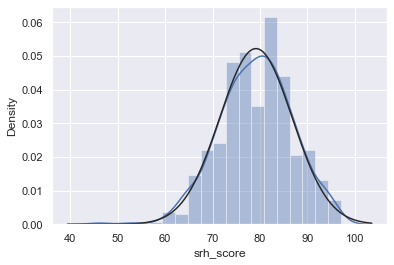

In [47]:
plt.close('all')
_ = sns.distplot(data['srh_score'], fit=norm)
plt.show()

In [48]:
data['SE'].describe().round(2)

count    509.00
mean      54.07
std       15.60
min        0.00
25%       44.00
50%       56.00
75%       64.00
max       88.00
Name: SE, dtype: float64

In [49]:
data[(data["SE"]>69.66)].describe()

,Self Esteem Score,SE,Age_imp,N1_imp,N2_imp,N3_imp,N4_imp,N5_imp,P1_imp,P2_imp,P3_imp,P4_imp,D1_imp,D2_imp,D3_imp,D4_imp,D5_imp,D6_imp,S1_imp,S2_imp,S3_imp,S4_imp,S5_imp,M1_imp,M2_imp,M3_imp,M4_imp,M5_imp,M6_imp,PS1_imp,PS2_imp,PS3_imp,PS4_imp,B1_imp,B2_imp,B3_imp,B4_imp,B5_imp,nutrition_score,parental_connection_score,decision_making_score,sp_harassment_score,mhm_score,pi_sa_score,body_image_score,srh_score
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.0,88.000000,88.0,88.000000,88.000000,88.000000,88.000000,88.00000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,18.965909,75.863636,16.159091,2.704545,1.204545,2.829545,2.147727,2.090909,2.852273,2.806818,2.352273,2.750000,2.477273,2.329545,1.500000,2.261364,2.375000,2.443182,2.727273,2.556818,2.636364,2.829545,2.875000,2.034091,2.727273,2.329545,2.034091,2.295455,2.511364,2.625000,3.0,2.988636,3.0,2.943182,2.806818,2.909091,2.886364,2.75000,10.977273,10.761364,11.011364,13.625000,13.931818,11.613636,14.295455,86.215909
std,1.108472,4.433887,1.202357,0.458861,0.458861,0.484746,0.597692,0.752564,0.387737,0.451255,0.802865,0.592093,0.742430,0.798297,0.773111,0.719104,0.593306,0.770997,0.496592,0.622526,0.697810,0.484746,0.395739,0.915371,0.540908,0.867306,0.779756,0.846346,0.643166,0.630863,0.0,0.106600,0.0,0.277839,0.397057,0.289127,0.353369,0.48542,1.523587,1.330408,2.230892,1.432886,2.094302,0.650938,1.063059,6.469111
min,18.000000,72.000000,14.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,2.000000,3.0,1.000000,2.000000,2.000000,1.000000,1.00000,6.000000,6.000000,4.000000,8.000000,8.000000,10.000000,11.000000,69.000000
25%,18.000000,72.000000,15.000000,2.000000,1.000000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.750000,2.000000,3.000000,3.000000,3.000000,1.000000,3.000000,1.000000,1.000000,1.750000,2.000000,2.000000,3.0,3.000000,3.0,3.000000,3.000000,3.000000,3.000000,3.00000,10.000000,10.000000,9.750000,13.000000,12.000000,11.000000,14.000000,82.000000
50%,19.000000,76.000000,16.000000,3.000000,1.000000,3.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.0,3.000000,3.0,3.000000,3.000000,3.000000,3.000000,3.00000,11.000000,11.000000,11.000000,14.000000,14.000000,12.000000,15.000000,87.000000
75%,20.000000,80.000000,17.000000,3.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0,3.000000,3.0,3.000000,3.000000,3.000000,3.000000,3.00000,12.000000,12.000000,13.000000,15.000000,15.250000,12.000000,15.000000,91.000000
max,22.000000,88.000000,20.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0,3.000000,3.0,3.000000,3.000000,3.000000,3.000000,3.00000,14.000000,12.000000,15.000000,15.000000,18.000000,12.000000,15.000000,97.000000


In [50]:
data[(data["SE"]<38.48)].describe()

,Self Esteem Score,SE,Age_imp,N1_imp,N2_imp,N3_imp,N4_imp,N5_imp,P1_imp,P2_imp,P3_imp,P4_imp,D1_imp,D2_imp,D3_imp,D4_imp,D5_imp,D6_imp,S1_imp,S2_imp,S3_imp,S4_imp,S5_imp,M1_imp,M2_imp,M3_imp,M4_imp,M5_imp,M6_imp,PS1_imp,PS2_imp,PS3_imp,PS4_imp,B1_imp,B2_imp,B3_imp,B4_imp,B5_imp,nutrition_score,parental_connection_score,decision_making_score,sp_harassment_score,mhm_score,pi_sa_score,body_image_score,srh_score
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.00000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,6.973333,27.893333,17.080000,2.360000,1.653333,2.253333,1.813333,1.960000,2.146667,2.200000,1.946667,2.106667,2.000000,2.026667,1.680000,2.320000,2.360000,2.253333,2.360000,2.120000,2.000000,2.333333,2.56000,1.586667,2.373333,2.133333,1.893333,1.853333,2.093333,2.280000,2.613333,2.813333,2.786667,2.706667,2.346667,2.586667,2.506667,2.200000,10.040000,8.400000,10.293333,11.373333,11.933333,10.493333,12.346667,74.880000
std,2.066289,8.265155,1.828897,0.584484,0.762169,0.839777,0.585716,0.812736,0.691519,0.805387,0.868259,0.814950,0.854242,0.900050,0.791167,0.808067,0.629028,0.718356,0.746885,0.734479,0.821995,0.776919,0.66251,0.823528,0.749294,0.827457,0.798196,0.880622,0.738394,0.780852,0.714584,0.484722,0.501170,0.673300,0.667657,0.638692,0.742045,0.716599,1.920304,2.033503,2.508221,2.116686,2.606299,1.818622,2.016776,7.589039
min,0.000000,0.000000,14.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,6.000000,0.000000,2.000000,6.000000,6.000000,4.000000,7.000000,46.000000
25%,6.000000,24.000000,16.000000,2.000000,1.000000,1.500000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.00000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.500000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,9.000000,7.000000,9.000000,10.000000,10.000000,10.000000,11.000000,70.000000
50%,7.000000,28.000000,17.000000,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,3.00000,1.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,10.000000,9.000000,10.000000,11.000000,12.000000,11.000000,12.000000,75.000000
75%,8.000000,32.000000,18.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,11.000000,10.000000,12.000000,12.500000,13.000000,12.000000,14.000000,79.500000
max,9.000000,36.000000,21.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,14.000000,12.000000,15.000000,15.000000,18.000000,12.000000,15.000000,88.000000


In [51]:
data[(data["srh_score"]>=74) & (data["srh_score"]<=85)].describe()

,Self Esteem Score,SE,Age_imp,N1_imp,N2_imp,N3_imp,N4_imp,N5_imp,P1_imp,P2_imp,P3_imp,P4_imp,D1_imp,D2_imp,D3_imp,D4_imp,D5_imp,D6_imp,S1_imp,S2_imp,S3_imp,S4_imp,S5_imp,M1_imp,M2_imp,M3_imp,M4_imp,M5_imp,M6_imp,PS1_imp,PS2_imp,PS3_imp,PS4_imp,B1_imp,B2_imp,B3_imp,B4_imp,B5_imp,nutrition_score,parental_connection_score,decision_making_score,sp_harassment_score,mhm_score,pi_sa_score,body_image_score,srh_score
count,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,13.440000,53.76000,16.596667,2.503333,1.430000,2.500000,1.916667,2.090000,2.496667,2.530000,2.196667,2.423333,2.003333,2.113333,1.663333,2.270000,2.396667,2.310000,2.563333,2.266667,2.276667,2.463333,2.766667,1.640000,2.580000,2.220000,1.903333,1.930000,2.283333,2.430000,2.860000,2.780000,2.880000,2.82000,2.540000,2.790000,2.690000,2.386667,10.440000,9.646667,10.360000,12.336667,12.556667,10.950000,13.226667,79.516667
std,3.535733,14.14293,1.479172,0.551667,0.642763,0.733799,0.551425,0.759709,0.586916,0.651035,0.783177,0.743392,0.832044,0.838351,0.786586,0.747638,0.616920,0.749961,0.648633,0.685899,0.857851,0.759767,0.503056,0.786848,0.614975,0.841006,0.727383,0.825047,0.666736,0.697655,0.440887,0.540902,0.415744,0.49167,0.585556,0.469006,0.617932,0.662282,1.416482,1.419580,2.094043,1.698904,1.717543,1.426282,1.504271,3.475147
min,0.000000,0.00000,14.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.00000,1.000000,0.000000,1.000000,1.000000,6.000000,6.000000,4.000000,8.000000,8.000000,4.000000,8.000000,74.000000
25%,11.000000,44.00000,16.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.00000,2.000000,3.000000,3.000000,2.000000,10.000000,9.000000,9.000000,11.000000,12.000000,10.000000,12.000000,77.000000
50%,14.000000,56.00000,17.000000,3.000000,1.000000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,2.000000,11.000000,10.000000,10.000000,12.000000,13.000000,11.000000,14.000000,80.000000
75%,16.000000,64.00000,17.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,11.000000,11.000000,12.000000,14.000000,14.000000,12.000000,14.000000,82.000000
max,22.000000,88.00000,21.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,14.000000,12.000000,15.000000,15.000000,16.000000,12.000000,15.000000,85.000000


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


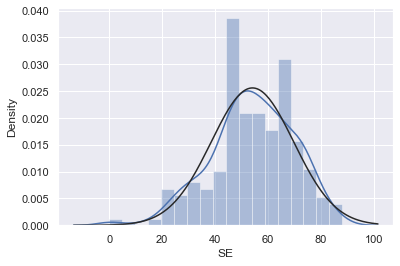

In [52]:
plt.close('all')
_ = sns.distplot(data['SE'], fit=norm)
plt.show()

In [53]:
data["srh_score"].describe().round(2)

count    509.00
mean      79.16
std        7.65
min       46.00
25%       74.00
50%       79.00
75%       85.00
max       97.00
Name: srh_score, dtype: float64

In [54]:
data["Edu Status"].value_counts()

Enrolled    451
Dropout      58
Name: Edu Status, dtype: int64

<AxesSubplot:ylabel='Marital Status'>

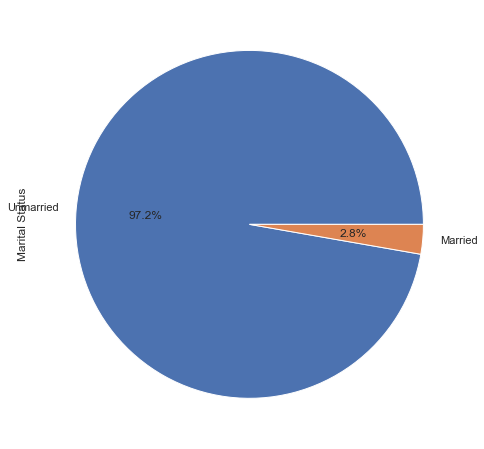

In [55]:
data["Marital Status"].value_counts().plot.pie(autopct="%.1f%%", figsize=(8, 8))

<AxesSubplot:ylabel='Age_imp'>

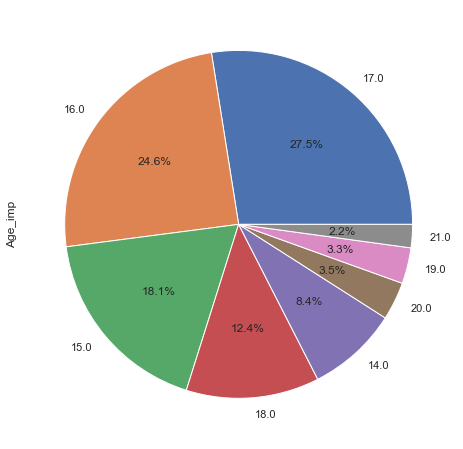

In [56]:
data["Age_imp"].value_counts().plot.pie(autopct="%.1f%%", figsize=(8, 8))

<AxesSubplot:ylabel='Edu Status'>

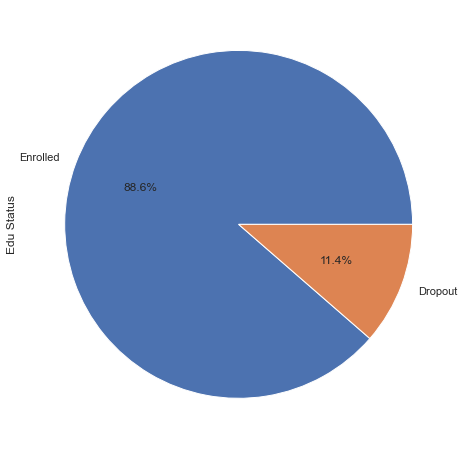

In [57]:
data["Edu Status"].value_counts().plot.pie(autopct="%.1f%%", figsize=(8, 8))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Age_imp', ylabel='SE'>

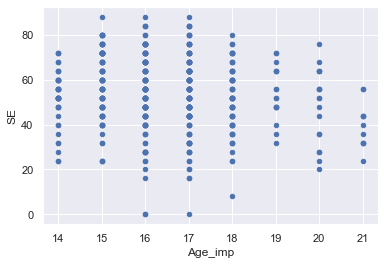

In [58]:
data.plot.scatter(x="Age_imp", y="SE")

In [59]:
data.groupby("Age_imp")["srh_score"].describe()

,count,mean,std,min,25%,50%,75%,max
Age_imp,,,,,,,,
14.0,43.0,77.697674,8.865489,60.0,72.0,79.0,82.00,96.0
15.0,92.0,82.782609,7.645765,62.0,78.0,83.5,88.25,97.0
16.0,125.0,78.704000,7.400985,46.0,74.0,79.0,83.00,94.0
17.0,140.0,79.428571,7.517024,53.0,74.0,80.0,85.00,95.0
18.0,63.0,77.111111,5.962547,65.0,74.0,77.0,81.00,95.0
19.0,17.0,78.764706,6.349502,65.0,75.0,80.0,84.00,86.0
20.0,18.0,77.611111,8.367577,61.0,74.0,78.0,82.00,94.0
21.0,11.0,71.090909,3.144982,65.0,70.0,71.0,73.00,76.0


<AxesSubplot:xlabel='Age_imp', ylabel='SE'>

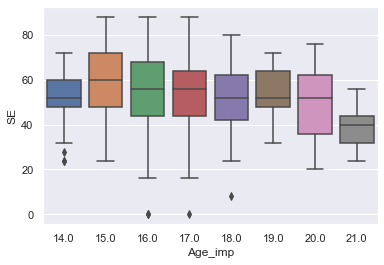

In [60]:
sns.boxplot(x="Age_imp", y="SE", data=data)

<AxesSubplot:xlabel='Marital Status', ylabel='srh_score'>

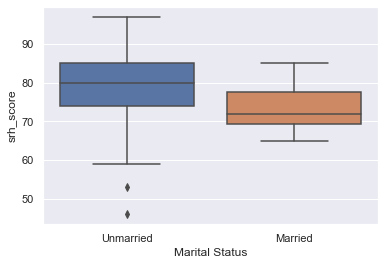

In [61]:
sns.boxplot(x="Marital Status", y="srh_score", data=data)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='SE', ylabel='srh_score'>

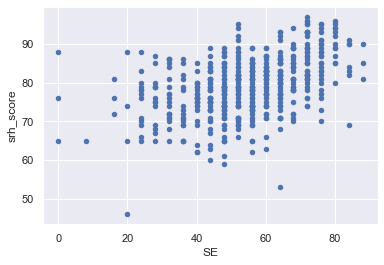

In [62]:
data.plot.scatter(x="SE", y="srh_score")

In [63]:
data.columns

Index(['Res_Code', 'Name', 'Marital Status', 'Edu Status', 'Self Esteem Score', 'SE', 'Age_imp', 'N1_imp', 'N2_imp', 'N3_imp', 'N4_imp', 'N5_imp', 'P1_imp', 'P2_imp', 'P3_imp', 'P4_imp', 'D1_imp', 'D2_imp', 'D3_imp', 'D4_imp', 'D5_imp', 'D6_imp', 'S1_imp', 'S2_imp', 'S3_imp', 'S4_imp', 'S5_imp', 'M1_imp', 'M2_imp', 'M3_imp', 'M4_imp', 'M5_imp', 'M6_imp', 'PS1_imp', 'PS2_imp', 'PS3_imp', 'PS4_imp', 'B1_imp', 'B2_imp', 'B3_imp', 'B4_imp', 'B5_imp', 'nutrition_score', 'parental_connection_score', 'decision_making_score', 'sp_harassment_score', 'mhm_score', 'pi_sa_score', 'body_image_score', 'srh_score'], dtype='object')

In [64]:
cols = ['SE', 'nutrition_score', 'parental_connection_score', 'decision_making_score', 'sp_harassment_score', 'mhm_score', 'pi_sa_score', 'body_image_score', 'srh_score']

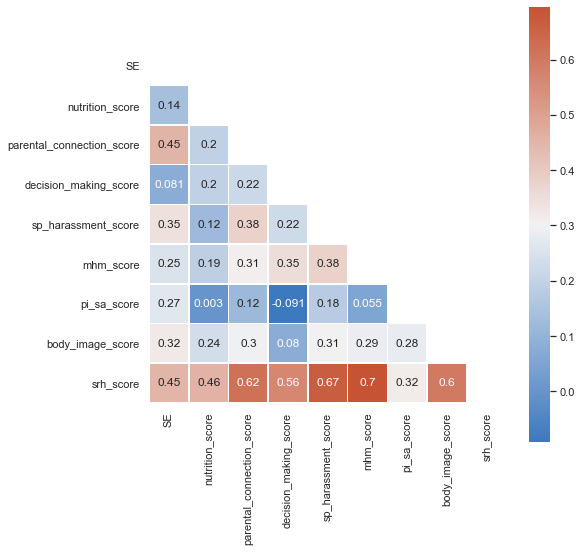

In [65]:
corrmat = data[cols].corr()
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True

plt.close('all') 
with sns.axes_style("white"):
    _, _ = plt.subplots(figsize=(8, 8))
    ax = sns.heatmap(corrmat, square=True, cmap=sns.diverging_palette(250, 20, s=80, as_cmap=True), mask=mask, linewidths=.5, annot=True)
plt.show()

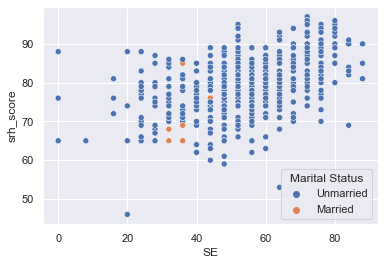

In [66]:
plt.close('all') 
sns.scatterplot(data=data, x="SE", y="srh_score", hue='Marital Status')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


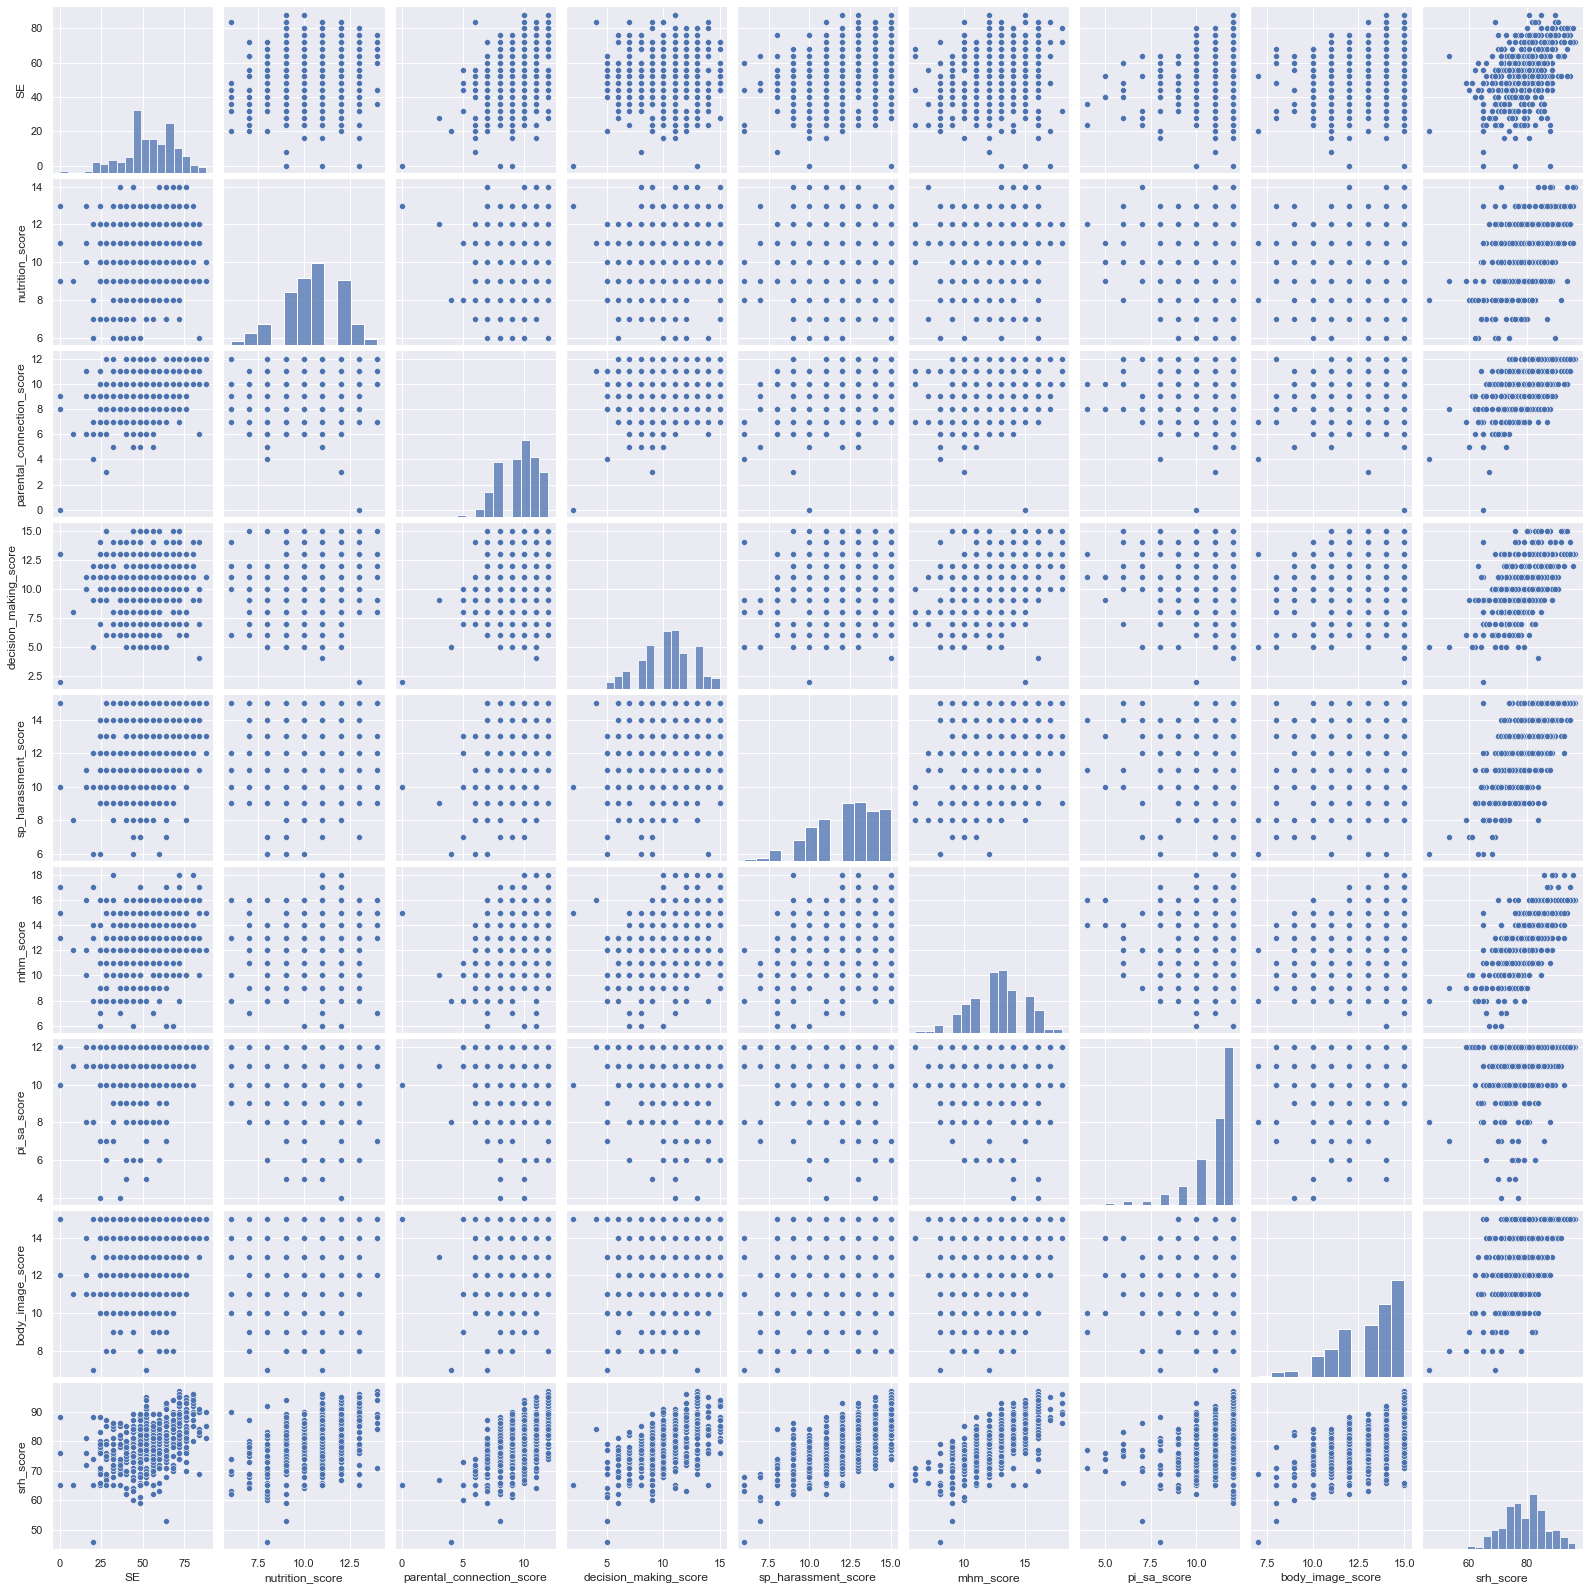

In [67]:
plt.close('all') 
sns.pairplot(data[cols], size = 2.5)
plt.show()

In [68]:
cat_cols = [
    'Age_imp', 'Marital Status', 'Edu Status', 'SE', 'nutrition_score', 'parental_connection_score', 'decision_making_score', 'sp_harassment_score', 'mhm_score', 'pi_sa_score', 'body_image_score', 'srh_score']

In [69]:
cat_data = data[cat_cols]

In [70]:
for col in cat_data.columns:
    cat_data[col] = cat_data[col].astype('category').cat.codes

<ipython-input-70-13eae0775fd1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data[col] = cat_data[col].astype('category').cat.codes


In [71]:
resultant_p = pd.DataFrame(data=[(0 for i in range(len(cat_data.columns))) for i in range(len(cat_data.columns))], 
                         columns=list(cat_data.columns))
resultant_p.set_index(pd.Index(list(cat_data.columns)), inplace = True)

In [72]:
resultant_c = pd.DataFrame(data=[(0 for i in range(len(cat_data.columns))) for i in range(len(cat_data.columns))], 
                         columns=list(cat_data.columns))
resultant_c.set_index(pd.Index(list(cat_data.columns)), inplace = True)

In [73]:
for i in list(cat_data.columns):
    for j in list(cat_data.columns):
        if i != j:
            chi2_val, p_val = chi2(np.array(cat_data[i]).reshape(-1, 1), np.array(cat_data[j]).reshape(-1, 1))
            resultant_p.loc[i,j] = p_val
            resultant_c.loc[i,j] = chi2_val

In [74]:
resultant_p < 0.05

,Age_imp,Marital Status,Edu Status,SE,nutrition_score,parental_connection_score,decision_making_score,sp_harassment_score,mhm_score,pi_sa_score,body_image_score,srh_score
Age_imp,True,True,True,False,False,False,False,False,True,True,False,True
Marital Status,False,True,False,False,False,False,False,False,False,False,False,False
Edu Status,False,False,True,False,False,False,False,False,False,False,False,False
SE,True,True,True,True,True,True,True,True,True,True,True,True
nutrition_score,False,False,False,False,True,True,True,False,False,False,True,True
parental_connection_score,False,True,False,True,False,True,False,True,True,False,True,True
decision_making_score,False,False,True,False,True,True,True,True,True,False,False,True
sp_harassment_score,False,False,False,True,False,True,True,True,True,True,True,True
mhm_score,True,True,False,True,True,True,True,True,True,True,True,True
pi_sa_score,False,False,False,False,False,False,False,False,False,True,False,False


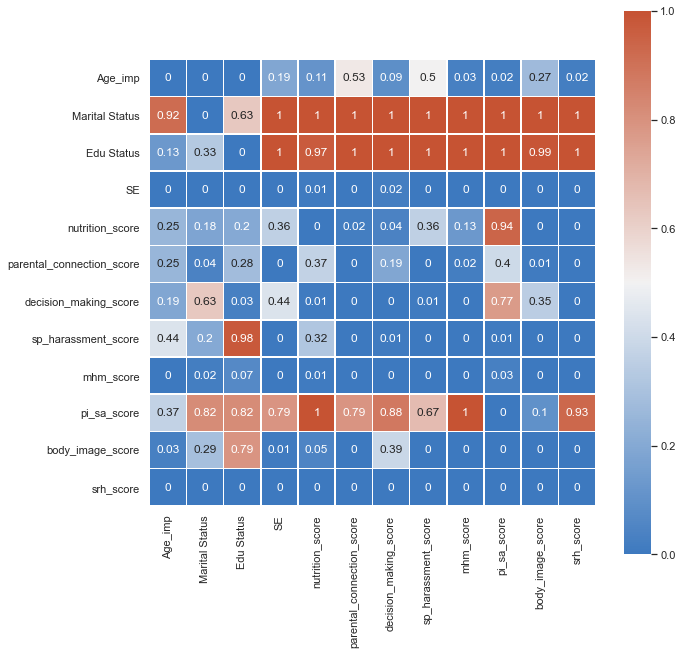

In [75]:
mask = np.zeros_like(resultant_p)
# mask[np.triu_indices_from(mask)] = True

plt.close('all') 
with sns.axes_style("white"):
    _, _ = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(resultant_p.round(2), square=True, cmap=sns.diverging_palette(250, 20, s=80, as_cmap=True), mask=mask, linewidths=.5, annot=True)
plt.show()